# Lab 2

## Regression Analysis

### Introduction

This lab introduces you to the Regression problems and how to apply the solutions. Furthermore, you will learn how to prepare the dataset into a machine learning model.

### Objectives

- Data exploration
- Data preparation
- Implementing Linear Regression algorithm
- Encoding Categorical Data (Converting categorical data to numbers)
- Data Scaling
- Implementing Polynomial Regression algorithm
- Multiple linear regression


### Regression
1. What is regression?
2. Why we need to explore the Data for Regression, specifically?
3. What methods do we usually use for data preparation?
3. When Do We Need Regression?


### Linear Regression
1. What is linear regression?
</span>

####  In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just one explanatory variables.

#### Import the libraries


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Load data and explore the data

In [3]:
dataset = pd.read_csv('res/student_scores.csv')
dataset.shape

(25, 2)

In [4]:
dataset.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##### Data Plotting:
Plot the data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data:

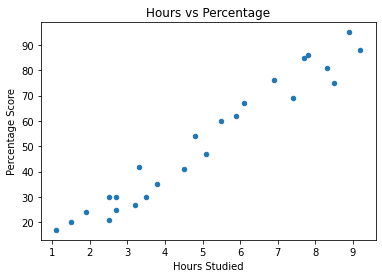

In [12]:
dataset.plot(x='Hours', y='Scores', kind="scatter")
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

#### Splitting data into train / test sets

In [6]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

# Write one line below to split the dataset into train / test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Build Linear Regression Model

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Train the model on the X_train and y_train, write one line below
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

2.018160041434662
[9.91065648]


#### Evaluate the performance of the linear regression model on test dataset

In [8]:
# let's get predictions of the X_test by our model, assign the result into y_pre value, write one line below
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Task: Measure the performance of the model using the root mean squared error, mean absolute error and coefficient of determination $R^2$.

Recall the formulas of the MAE:

![MAE formula](res/mae_formula.png "MAE formula")

MSE:

![MSE formula](res/mse_formula.png "MSE formula")

MSE:

![RMSE formula](res/rmse.png "RMSE formula")



Q: What RMSE, MSE and R-squared tell us?

<span style="color:blue"> 
In short, MAE evaluates the absolute distance of the observations (the entries of the dataset) to the predictions on a regression, taking the average over all observations. We use the absolute value of the distances so that negative errors are accounted properly. </span>

<span style="color:blue">Another way to do so is by squaring the distance, so that the results are positive. This is done by the MSE, and higher errors (or distances) weigh more in the metric than lower ones, due to the nature of the power function. </span>


<span style="color:blue"> A backlash in MSE is the fact that the unit of the metric is also squared, so if the model tries to predict price in US$, the MSE will yield a number with unit (US$)² which does not make sense. RMSE is used then to return the MSE error to the original unit by taking the square root of it, while maintaining the property of penalizing higher errors.</span>


<span style="color:blue">
Both RMSE and MSE tell us how much our predictions will be away from the truth on average.
$R^2$ tells us the proportion of the variance/variability in the Y was explained by the model via the explanatory variables. </span>

In [9]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


## Encoding Categorical Data (Converting categorical data to numbers)

There are two common approaches for converting ordinal and categorical variables to numerical values. They are:

- Ordinal Encoding
- One-Hot Encoding

### Ordinal Encoding

In ordinal encoding, each unique category value is assigned an integer value.

For example, “red” is 1, “green” is 2, and “blue” is 3.

This is called an ordinal encoding or an integer encoding and is easily reversible. Often, integer values starting at zero are used.

In [13]:
# example of a ordinal encoding
from numpy import asarray
# define data
data = asarray([['red'], ['green'], ['blue']])
print(data)

[['red']
 ['green']
 ['blue']]


Let's convert the above categorical data into numerical via Ordinal Encoder method:

In [14]:
from sklearn.preprocessing import OrdinalEncoder
# define ordinal encoding
encoder = OrdinalEncoder()

# todo: write one line code below to transform categorical data into numerical via OrdinalEncoder
result = encoder.fit_transform(data)

print(result)

[[2.]
 [1.]
 [0.]]


1. When should we use OrdinalEncoding? <span style="color:blue"> The integer values have a natural ordered relationship between each other and machine learning algorithms may be able to understand and harness this relationship.

2. When should not we use OrdinalEncoding? What are the disadvantages of it? <span style="color:blue"> For categorical variables where no ordinal relationship exists, the integer encoding may not be enough, at best, or misleading to the model at worst. Forcing an ordinal relationship via an ordinal encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).


### One-Hot Encoding

" Each bit represents a possible category. If the variable cannot belong to multiple categories at once, then only one bit in the group can be “on.” This is called one-hot encoding … " — Page 78, Feature Engineering for Machine Learning, 2018.

We can demonstrate the usage of the OneHotEncoder on the color categories. First the categories are sorted, in this case alphabetically because they are strings, then binary variables are created for each category in turn. This means blue will be represented as [1, 0, 0] with a “1” in for the first binary variable, then green, then finally red.

In [12]:
# example of a one hot encoding
from numpy import asarray
# define data
data = asarray([['red'], ['green'], ['blue']])
print(data)

[['red']
 ['green']
 ['blue']]


Let's convert the above categorical data into numerical via One-Hot Encoder method:

In [13]:
from sklearn.preprocessing import OneHotEncoder

# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# todo: write one line code below to transform categorical data into numerical via OneHotEncoder
onehot = encoder.fit_transform(data)
print(onehot)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


## Data Scaling

Machine learning algorithm just sees number — if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training the model.

The machine learning algorithm works on numbers and does not know what that number represents. A weight of 10 grams and a price of 10 dollars represents completely two different things — which is a no brainer for humans, but for a model as a feature, it treats both as same.

Suppose we have two features of weight and price, as in the below table. The “Weight” cannot have a meaningful comparison with the “Price.” So the assumption algorithm makes that since “Weight” > “Price,” thus “Weight,” is more important than “Price.”

![Fruit weight price example](res/fruit_weight_price.png "Fruit example")


So these more significant number starts playing a more decisive role while training the model. Thus feature scaling is needed to bring every feature in the same footing without any upfront importance. Interestingly, if we convert the weight to “Kg,” then “Price” becomes dominant.

Another reason why feature scaling is applied is that few algorithms like Neural network gradient descent converge much faster with feature scaling than without it.

![Converge example](res/converge_example.png "Converge example")

### Data scaling technique: Data normalization
Normalization is a rescaling of the data from the original range so that all values are within the range of 0 and 1 (or other ranges).

Normalization requires that you know or are able to accurately estimate the minimum and maximum observable values. You may be able to estimate these values from your available data.

The formula for normalization:

$x^{(i)}_{normalized} = (x^{(i)} - min(X)) / (max(X) - min(X))$, where $X = [x_0, x_1, ... x_i, ... x_n]$

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.DataFrame({'WEIGHT': [15, 18, 12,10],
                   'PRICE': [1,3,2,5]},
                   index = ['Orange','Apple','Banana','Grape'])
print(df)

        WEIGHT  PRICE
Orange      15      1
Apple       18      3
Banana      12      2
Grape       10      5


Let's apply the min-max scaler, or normalization to the above dataset

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# todo: apply min-max scaler to the df dataset, write one line code below
min_max_scaled_data = scaler.fit_transform(df)

df1 = pd.DataFrame(min_max_scaled_data, columns=['WEIGHT','PRICE'], index = ['Orange','Apple','Banana','Grape'])
print(df1)

        WEIGHT  PRICE
Orange   0.625   0.00
Apple    1.000   0.50
Banana   0.250   0.25
Grape    0.000   1.00


### Data scaling technique: Data Standardization

Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1. It is sometimes referred to as “whitening.”

This can be thought of as subtracting the mean value or centering the data.

Like normalization, standardization can be useful, and even required in some machine learning algorithms when your data has input values with differing scales.

Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well behaved mean and standard deviation. You can still standardize your data if this expectation is not met, but you may not get reliable results.

Standardization requires that you know or are able to accurately estimate the mean and standard deviation of observable values. You may be able to estimate these values from your training data.

The formula is:

$y = \frac{(x - mean)} {standard\_deviation}$

where:
- $mean = \frac{sum(x)}{count(x)}$
- $standard\_deviation = \sqrt{\frac{\sum (x - mean)^2}{count(x)}}$

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.DataFrame({'WEIGHT': [15, 18, 12,10],
                   'PRICE': [1,3,2,5]},
                   index = ['Orange','Apple','Banana','Grape'])
print(df)

        WEIGHT  PRICE
Orange      15      1
Apple       18      3
Banana      12      2
Grape       10      5


Let's apply the standard scaler to the above dataset

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# todo: apply standard scaler to the df dataset, write one line code below
scaled_df = scaler.fit_transform(df)
df2 = pd.DataFrame(scaled_df,
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
print(df2)

          WEIGHT     PRICE
Orange  0.412393 -1.183216
Apple   1.402136  0.169031
Banana -0.577350 -0.507093
Grape  -1.237179  1.521278


Data standardization vs normalization, which one to use?


![Feature scaling, standartization vs Max min](res/f_scaling_stand_vs_max_min.png "Feature scaling, standartization vs Max min")

![Feature scaling](res/f_scaling_c_age.png "Feature scaling")

![Feature scaling](res/f_scaling_c_salary.png "Feature scaling")

<span style="color:blue">
From the above graphs, we can clearly notice that applying Max-Min Nomaralisation in our dataset has generated smaller standard deviations (Salary and Age) than using Standardisation method. It implies the data are more concentrated around the mean if we scale data using Max-Min Nomaralisation.

As a result, if you have outliers in your feature (column), normalizing your data will scale most of the data to a small interval, which means all features will have the same scale but does not handle outliers well. Standardisation is more robust to outliers, and in many cases, it is preferable over Max-Min Normalisation.

see this article for more information: https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html 
</span>

### Polynomial Regression
Polynomial Regression, is simply a transformation for the explanatory variables to higher polynomial orders with interactive variables.
1. Why do we need it?
<span style="color:blue"> One of the main assumptions of LR is the "linearity": that the relationship between X and y is linear. If this assumption doesn't hold, we need to transform the X to be close to the linearity.
1. Which order of the polynomial should we choose? 
<span style="color:blue"> Clearly, the higher the order of the polynomial, the higher the complexity of the model. This is true both computationally and conceptually because in both cases we now have a higher number of adaptable parameters. The higher the complexity of a model the more variance it can capture. Choosing the order of the model depends on the variance-bias trade-off of the model. </span>
2. Should we always pick the most complex model? 
<span style="color:blue"> No: we have to strike a balance between variance and (inductive) bias: our model needs to have sufficient complexity to model the relationship between the predictors and the response, but it must have the ability to generalize to new, unseen cases. </span>

#### We will create a synthetic dataset by adding some random gaussian noise to a cosinusoidal function.
#### Import libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#### Create sinusoidal function

In [19]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

#### Create a synthetic dataset by adding some random gaussian noise to a cosinusoidal function

In [20]:
np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

#### We will build three polynomial models with degrees [1, 4, 15] and observe the effect of increasing the degree of complixity of the model on how well it suits the data.


Task: Write a pipeline of PolynomialFeatures transformation then, LinearRegression mode to be applied on X & y.
Then get the cross validation scores with the appropriate scoring argument with k = 10.

Q: What's your observation?
<span style="color:blue">The first model with degree with degree 1 is linear, very simple, and very fast to compute but it suffers from underfitting since it does not fir the training or the testing datasets. The second model with degree 4 looks suilable for the data. The third model with degree 15 fits the training dataset too much and suffers from underfitting.

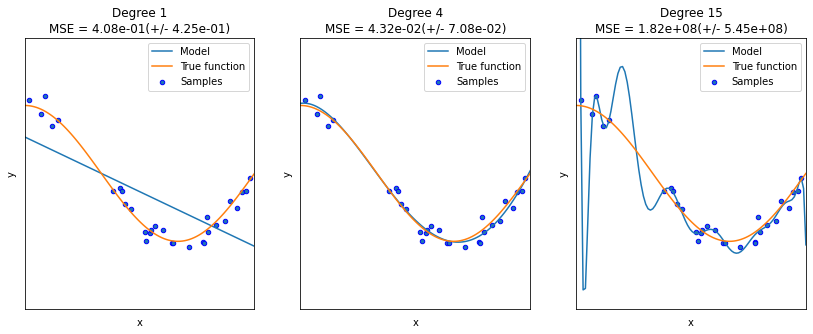

In [21]:

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i])
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

## Multiple linear regression

When should we use multiple linear regression? <span style="color:blue"> When we have more than one feature that affect the output, then we use multiple linear regression to take into account multiple features.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import math

#### Dataset

As dataset, we will use the following dataset:
https://www.kaggle.com/mohansacharya/graduate-admissions

We have already downloaded the CSV of the dataset (Admission_Predict.csv) and we just load it through pandas:

In [23]:
df = pd.read_csv('res/Admission_Predict.csv')

Let's get familiar with the dataet.

In [24]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Now let's understand the format of the dataset, i.e. datatypes etc.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


For more convenience working with dataset, let's convert it from pandas dataframe into numpy array. Also, we should select float as a dataformat of all the columns.



Let's extract feature variable (X) and label variable (Y) from the dataset:

In [26]:
cols = [0,8]
X = df.drop(df.columns[cols],axis=1)
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


Let's explore the dataset with Seaborn.

First, let's see how the range of the columns' values differ from each other

<AxesSubplot:>

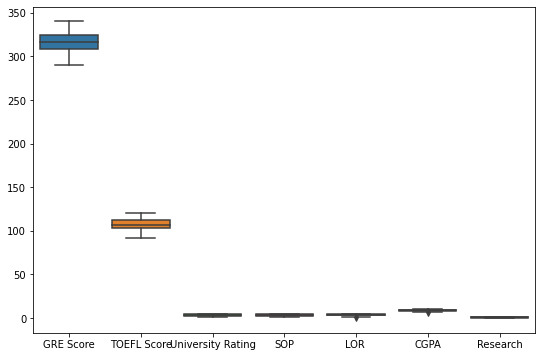

In [27]:
# New boxplot using stats_df
plt.figure(figsize=(9,6)) # Set plot dimensions
sns.boxplot(data=X)

As you we can see, the GRE Score column and TOEFL column have high values compared to other columns. This can have a negative influence on our model, since the large values will impact on the training process more.

That's why we need to apply normalization.

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

columns_ = ['GRE Score','TOEFL Score', 'University Rating','SOP','LOR','CGPA','Research']

# todo: apply min-max scaler to the df dataset, write one line code below
X = scaler.fit_transform(X)

X = pd.DataFrame(X, columns=columns_)
print(X.head())

   GRE Score  TOEFL Score  University Rating    SOP    LOR      CGPA  Research
0       0.94     0.928571               0.75  0.875  0.875  0.913462       1.0
1       0.68     0.535714               0.75  0.750  0.875  0.663462       1.0
2       0.52     0.428571               0.50  0.500  0.625  0.384615       1.0
3       0.64     0.642857               0.50  0.625  0.375  0.599359       1.0
4       0.48     0.392857               0.25  0.250  0.500  0.451923       0.0


In [29]:
Y = df.iloc[:, [8]]
Y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


Split X and Y into training and test sets

In [30]:
from sklearn.model_selection import train_test_split

# write one line code to split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [31]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,0.64,0.642857,0.5,0.625,0.375,0.599359,1.0
18,0.56,0.642857,0.5,0.750,0.500,0.641026,0.0
202,1.00,1.000000,1.0,0.875,0.875,0.996795,1.0
250,0.60,0.428571,0.5,0.500,0.375,0.567308,1.0
274,0.50,0.285714,0.0,0.250,0.375,0.368590,0.0


In [32]:
X_train.shape

(320, 7)

Now, let's instantinate the linear regression model and start the training process:

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# write one line code to train the model on the train set

model.fit(X_train, Y_train)

LinearRegression()

In [34]:
intercept = model.intercept_
print(intercept)
coefficients = model.coef_
print(coefficients)

[0.3630785]
[[ 0.09312548  0.07626324  0.0295098  -0.00117097  0.06308097  0.35776778
   0.02222705]]


Now let's predict the test dataset:

In [35]:
# write one line code to predect the test dataset by the model
Y_pred = model.predict(X_test)

Now we will create a dataframe to compare the predicted and actual labels (Y_test)

In [36]:
Y_pred = np.squeeze(Y_pred)

Y_test = np.squeeze(Y_test)

df_ = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})

In [37]:
df_.head()

,Actual,Predicted
209,0.68,0.651174
280,0.68,0.723687
33,0.90,0.935368
210,0.79,0.821643
93,0.44,0.581587


In [38]:
from sklearn import metrics

# write three lines of code to calculate the MAE, MSE and RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.04795673362091199
Mean Squared Error: 0.004617003377285012
Root Mean Squared Error: 0.06794853476922819


## References:
- https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/
- https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35
- https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html